In [294]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc,  confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.ensemble import  VotingRegressor, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression,  Lasso, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
import itertools as it
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor



#Libraries for visualizing trees
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import time as time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# These two lines avoid dead kernel after importing keras
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import keras
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers import Dense, InputLayer 

In [298]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [299]:
train = train.drop(columns = 'id')
X = train.drop(columns = 'y')
y = train['y']

In [300]:
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [301]:
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

Checking multicollinearity

In [9]:
corr_matrix = train.corr()
corr_matrix

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
x001,1.000000,-0.102542,0.153749,0.379679,0.493197,0.247154,-0.165646,-0.103770,-0.032586,-0.108841,...,-0.052222,-0.006532,-0.016382,-0.057818,0.602138,-0.058439,0.629004,-0.149572,-0.005274,0.002661
x002,-0.102542,1.000000,-0.177286,0.035330,-0.180123,0.071401,0.463602,0.961286,0.103345,0.257011,...,0.058053,0.104158,0.045745,0.102208,-0.007468,0.101158,0.017972,0.819495,-0.022161,-0.065831
x003,0.153749,-0.177286,1.000000,-0.066532,-0.052850,-0.113437,-0.500092,-0.197902,-0.179138,-0.323675,...,-0.252394,-0.137534,-0.091690,-0.234049,0.159373,-0.236631,0.204255,-0.500867,-0.005638,0.201294
x004,0.379679,0.035330,-0.066532,1.000000,0.231413,0.222151,0.126973,0.075906,0.038667,0.097453,...,0.082101,0.021076,0.011411,0.044423,0.186038,0.046296,0.225874,0.086455,0.005585,-0.021558
x005,0.493197,-0.180123,-0.052850,0.231413,1.000000,0.166817,-0.061912,-0.115242,0.069205,-0.077010,...,0.050146,0.131325,0.046695,0.040076,-0.007635,0.042812,-0.128443,-0.025749,0.060317,-0.060656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x762,-0.058439,0.101158,-0.236631,0.046296,0.042812,0.098511,0.366232,0.150967,0.942280,0.300473,...,0.842035,0.227901,0.042165,0.999511,-0.082885,1.000000,-0.101544,0.272372,-0.006575,-0.063036
x763,0.629004,0.017972,0.204255,0.225874,-0.128443,0.226026,-0.154933,-0.019153,-0.085807,-0.086384,...,-0.100417,-0.086515,-0.037527,-0.099358,0.794701,-0.101544,1.000000,-0.141807,-0.032923,0.009145
x764,-0.149572,0.819495,-0.500867,0.086455,-0.025749,0.116250,0.741603,0.853014,0.244453,0.478806,...,0.250796,0.210006,0.094214,0.269973,-0.133994,0.272372,-0.141807,1.000000,-0.016775,-0.128958
x765,-0.005274,-0.022161,-0.005638,0.005585,0.060317,-0.014770,-0.011229,-0.012326,-0.003104,-0.015868,...,-0.002085,-0.001432,-0.032845,-0.006884,-0.017833,-0.006575,-0.032923,-0.016775,1.000000,0.067693


In [151]:
# Sort the correlations into a series

corr_series = corr_matrix.unstack()
corr_series = corr_series[corr_series.index.get_level_values(0) != corr_series.index.get_level_values(1)]

sorted_corr = corr_series.sort_values(ascending=False)

# Pull perfect correlations

corr_1 = sorted_corr[sorted_corr == 1.0]

# Absolute value correlations
# Pull perfect correlations and those above 0.8

corr_series_abs = corr_series.abs()
sorted_corr_abs = corr_series_abs.sort_values(ascending=False)
corr_1_abs = sorted_corr_abs[sorted_corr_abs == 1.0]
corr_08_abs = sorted_corr_abs[(sorted_corr_abs > 0.8)]

In [144]:
# Create an empty set to store the features to be removed
features_to_remove = set()

# Iterate over the series and identify features to be removed
for pair, correlation in corr_08_abs.items():
    feature1, feature2 = pair
    features_to_remove.add(feature2)
    
# Assuming your dataset X_train is a pandas DataFrame
# Remove the unwanted features from the X_train DataFrame
X_train = X_train.drop(columns=features_to_remove)

In [302]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

len(to_drop)

<ipython-input-302-c52ce255f6c5>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


532

In [303]:
# Drop the highly correlated features
train = train.drop(train[to_drop], axis=1)
train

,x001,x002,x003,x004,x005,x006,x007,x009,x013,x014,...,x707,x712,x719,x727,x729,x734,x737,x741,x750,y
0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,14539.0,56.695,4.82,...,586885589994299981824,10.0295,1336.88,0.00,4.27,2.0,1.35495,0.752647,0.50,5
1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1051272.0,95.000,4.00,...,5550000000000000000,NaN,13877.56,0.09,4.27,8.0,-0.87106,0.959400,0.50,1
2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,144143.0,92.600,6.62,...,88897890482495995904,8.5580,5267.48,0.00,3.68,7.0,1.39396,0.908315,0.36,11
3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,10055.0,92.130,5.60,...,28732631875074998272,2.7726,359.02,0.00,4.23,6.0,1.34729,0.941133,0.50,1
4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,17914.0,94.550,2.43,...,44666736442821001216,5.6557,1291.61,0.90,4.15,16.0,1.46264,0.907586,0.45,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,4439.0,80.000,10.88,...,3970000000000000000,0.0000,0.00,0.00,4.52,7.0,1.15515,0.862925,0.43,4
5376,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,19106.0,97.760,5.40,...,302089053432449990656,4.6825,819.77,0.00,4.61,4.0,1.31724,0.918410,0.46,8
5377,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,71514.0,94.940,4.58,...,113673829679690006528,0.0000,1374.77,0.00,3.87,8.0,1.31993,0.900614,0.45,21
5378,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,13977.0,101.510,5.68,...,59483907779766001664,4.6474,891.79,0.00,4.01,2.0,1.30878,0.887655,0.39,13


Imputing data (and updating X and y data)

In [304]:
X = train.drop(columns = 'y')
y = train['y']

sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

In [305]:
# Imputing missing values
imputer = KNNImputer(n_neighbors=5)
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test),columns = X_test.columns)

Performing PCA

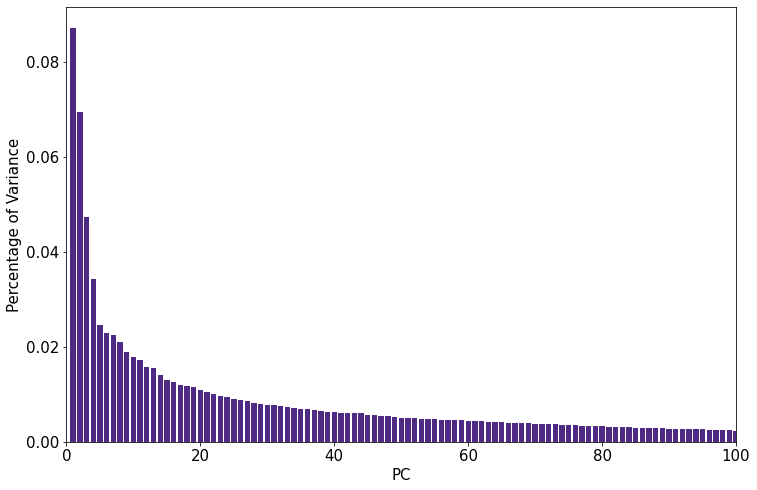

In [156]:
pca = PCA()
pca.fit(X_train)

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color = "#4E2A84")
plt.xlabel('PC')
plt.ylabel('Percentage of Variance')
plt.xlim(0,100)
plt.show()

In [157]:
pca = PCA(n_components=0.95, svd_solver = "full")
pca.fit(X_train)
print(pca.n_components_)

129


In [158]:
# transform the pandas dataframe into an array
X_train_transformed = pca.transform(X_train)

# transform the array back into a pandas dataframe
X_train_inverse_transformed = pd.DataFrame(pca.inverse_transform(X_train_transformed)[:, :pca.n_components_],
                                           columns=X_train.columns[:pca.n_components_])

X_train = X_train_inverse_transformed
X_test = X_test.loc[:, X_train.columns]

In [159]:
print(X_train.shape)
print(X_test.shape)

(3766, 129)
(1614, 129)


Neural Network

In [30]:
y_train.shape

(3766,)

In [160]:
network = Sequential() # empty network created
network.add(InputLayer(input_shape = (129,))) # Input layer added
network.add(Dense(64, activation = 'relu')) # First hidden layer added
network.add(Dense(32, activation = 'relu')) # Second hidden layer added
network.add(Dense(16, activation = 'relu')) # Three hidden layer added
network.add(Dense(1, activation = 'sigmoid')) # Output layer added

In [161]:
# Compile the model
network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

network.fit(X_train, y_train)
network.summary()

118/118 [==============================] - 0s 764us/step - loss: -358.3226 - accuracy: 0.1097
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 10,945
Trainable params: 10,945
Non-trainable params: 0
_________________________________________________________________


In [162]:
history = network.fit(X_train, y_train, epochs=10, batch_size = 32, validation_data=(X_test, y_test))

Epoch 1/10
118/118 [==============================] - 0s 2ms/step - loss: -16953.0527 - accuracy: 0.1142 - val_loss: -46988.0391 - val_accuracy: 0.1301
Epoch 2/10
118/118 [==============================] - 0s 944us/step - loss: -150302.8750 - accuracy: 0.1142 - val_loss: -300028.9375 - val_accuracy: 0.1301
Epoch 3/10
118/118 [==============================] - 0s 1ms/step - loss: -660762.6875 - accuracy: 0.1142 - val_loss: -1087891.0000 - val_accuracy: 0.1301
Epoch 4/10
118/118 [==============================] - 0s 1ms/step - loss: -2071995.3750 - accuracy: 0.1142 - val_loss: -3000562.2500 - val_accuracy: 0.1301
Epoch 5/10
118/118 [==============================] - 0s 2ms/step - loss: -4908247.0000 - accuracy: 0.1142 - val_loss: -6489178.0000 - val_accuracy: 0.1301
Epoch 6/10
118/118 [==============================] - 0s 1ms/step - loss: -9663647.0000 - accuracy: 0.1142 - val_loss: -12029225.0000 - val_accuracy: 0.1301
Epoch 7/10
118/118 [==============================] - 0s 972us/step 

In [163]:
y_pred = network.predict(X_train)

In [164]:
print(y_pred.shape)
print(y_train.shape)

(3766, 1)
(3766,)


Lasso

In [95]:
#Let us use cross validation to find the optimal value of the tuning parameter lambda
#For the optimal lambda, the cross validation error will be the least
#Note that we are reducing the range of alpha so as to better visualize the minimum

alphas = 10**np.linspace(-1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 1000000)
lassocv.fit(X_train, y_train)
#Optimal value of the tuning parameter - lamda
lassocv.alpha_


C:\Users\rolfe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.4099826788879, tolerance: 51.54151401593389
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\rolfe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382.68784861953463, tolerance: 51.54151401593389
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\rolfe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 624.7904051683145, tolerance: 51.54151401593389
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\rolfe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

KeyboardInterrupt: 

In [ ]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train, y)
pred=lasso.predict(Xtest_std)

Random Forest Model

In [32]:
#Finding model accuracy vs number of trees
oob_rsquared={};test_rsquared={};oob_rmse={};test_rmse = {}

for i in np.linspace(10,400,40,dtype=int):
    model = RandomForestRegressor(n_estimators=i, random_state=1,max_features="sqrt",
                        n_jobs=-1,oob_score=True).fit(X_train, y_train)
    oob_rsquared[i]=model.oob_score_  #Returns the out-of_bag R-squared of the model
    test_rsquared[i]=model.score(X_test,y_test) #Returns the test R-squared of the model
    oob_rmse[i]=np.sqrt(mean_squared_error(model.oob_prediction_,y_train))
    test_rmse[i]=np.sqrt(mean_squared_error(model.predict(X_test),y_test))

C:\Users\rolfe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


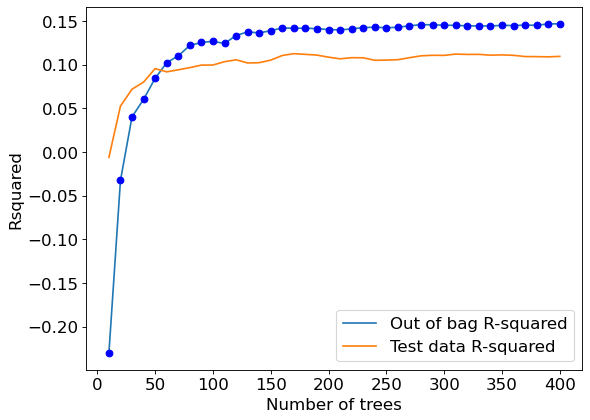

In [33]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(oob_rsquared.keys(),oob_rsquared.values(),label = 'Out of bag R-squared')
plt.plot(oob_rsquared.keys(),oob_rsquared.values(),'o',color = 'blue')
plt.plot(test_rsquared.keys(),test_rsquared.values(), label = 'Test data R-squared')
plt.xlabel('Number of trees')
plt.ylabel('Rsquared')
plt.legend()

In [87]:
#Optimizing with OOB score takes half the time as compared to cross validation. 
#The number of models developed with OOB score tuning is one-fifth of the number of models developed with
#5-fold cross validation
start_time = time.time()

n_samples = X_train.shape[0]
n_features = X_train.shape[1]

params = {'n_estimators': [100,200,300],
          'max_depth': [12,15,18],
          'max_leaf_nodes':[300,500,700],
          'max_features': [2,3,4]}

param_list=list(it.product(*(params[Name] for Name in params)))

oob_score = [0]*len(param_list)
i=0
for pr in param_list:
    model = RandomForestRegressor(random_state=1,oob_score=True,verbose=False,n_estimators = pr[0],
                                 max_depth=pr[1],
                                  max_leaf_nodes=pr[2],max_features=pr[3],
                                  n_jobs=-1).fit(X_train,y_train)
    oob_score[i] = model.oob_score_
    i=i+1
    
end_time = time.time()
print("time taken = ", (end_time-start_time)/60, " minutes")
print("Best params = ", param_list[np.argmax(oob_score)])
print("Best score (R-squared) = ", np.max(oob_score))

time taken =  0.7866912523905436  minutes
Best params =  (300, 18, 500, 4)
Best score (R-squared) =  0.23398546269748322


In [316]:
rf_best_params = param_list[np.argmax(oob_score)]

rf = RandomForestRegressor(n_estimators = rf_best_params[0],
                           max_depth = rf_best_params[1],
                           max_leaf_nodes = rf_best_params[2],
                           max_features = rf_best_params[3],
                           random_state=1,
                           n_jobs=-1).fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [89]:
feature_importances = rf.feature_importances_

rf_features = pd.DataFrame({'columns': X_train.columns,
                            'feature_importances': feature_importances})

#Top 30 feature importances
rf_features.sort_values(by='feature_importances', ascending=False).head(30)


,columns,feature_importances
9,x014,0.025876
53,x096,0.024684
57,x105,0.019328
35,x062,0.015996
40,x074,0.015632
77,x165,0.015405
104,x274,0.014651
59,x111,0.013418
45,x080,0.012869
126,x347,0.011812


In [90]:
print("Random Forest model RMSE = ", np.sqrt(mean_squared_error(rf.predict(X_test),y_test)))

Random Forest model RMSE =  10.29375916141382


ADA Boost

>100 14.851 (0.964)


Text(0.5, 0, 'Number of trees')

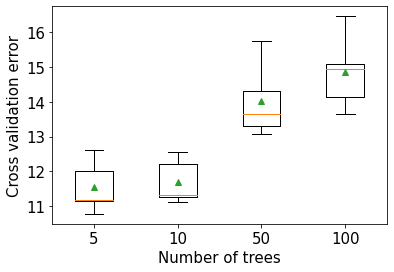

In [71]:
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [5, 10, 50, 100]
    for n in n_trees:
        models[str(n)] = AdaBoostRegressor(n_estimators=n,random_state=1)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X, y,scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    
print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Number of trees',fontsize=15)


>1 12.632 (0.453)
>2 12.903 (1.251)
>3 14.148 (0.774)
>4 12.557 (0.734)
>5 11.366 (0.690)


Text(0.5, 0, 'Depth of each tree')

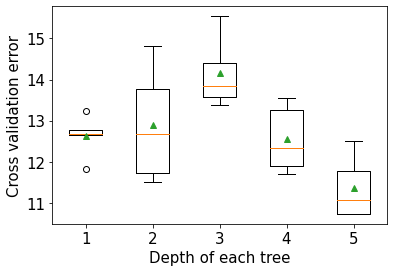

In [73]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore depths from 1 to 5
    for i in range(1,6):
        # define base model
        base = DecisionTreeRegressor(max_depth=i)
        # define ensemble model
        models[str(i)] = AdaBoostRegressor(base_estimator=base,n_estimators=50)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Depth of each tree',fontsize=15)

>9 10.614 (0.870)
>10 10.675 (0.876)
>11 10.753 (0.726)
>12 10.637 (0.817)


Text(0.5, 0, 'Depth of each tree')

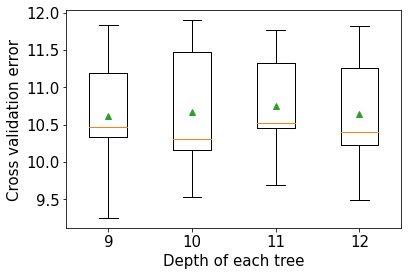

In [75]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore depths from 6 to 8
    for i in range(9,13):
        # define base model
        base = DecisionTreeRegressor(max_depth=i)
        # define ensemble model
        models[str(i)] = AdaBoostRegressor(base_estimator=base,n_estimators=50)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Depth of each tree',fontsize=15)

In [77]:
model = AdaBoostRegressor(random_state=1)
grid = dict()
grid['n_estimators'] = [5, 10, 50]
grid['learning_rate'] = [0.001, 0.01, 0.1]
grid['base_estimator'] = [DecisionTreeRegressor(max_depth=2), DecisionTreeRegressor(max_depth=6), 
                          DecisionTreeRegressor(max_depth=10)]
# define the evaluation procedure
cv = KFold(n_splits=5, shuffle=True, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: -115.479693 using {'base_estimator': DecisionTreeRegressor(max_depth=6), 'learning_rate': 0.1, 'n_estimators': 50}


In [80]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6), learning_rate = 0.1, 
                          n_estimators=50,random_state=1).fit(X_train, y_train)

In [83]:
print("AdaBoost model RMSE = ", np.sqrt(mean_squared_error(ada.predict(X_test),y_test)))

AdaBoost model RMSE =  10.392352404175933


In [82]:
feature_importances = ada.feature_importances_

ada_features = pd.DataFrame({'columns': X_train.columns,
                            'feature_importances': feature_importances})

#Top 30 feature importances
ada_features.sort_values(by='feature_importances', ascending=False).head(30)


,columns,feature_importances
9,x014,0.203200
57,x105,0.059790
124,x337,0.058577
53,x096,0.052799
104,x274,0.024392
31,x051,0.018098
8,x013,0.018076
12,x017,0.017277
3,x004,0.016575
34,x061,0.016540


Ensemble

In [309]:
ensemble_model = VotingRegressor(estimators=[('ada',ada),('rf',rf)])
ensemble_model.fit(X_train,y_train)
print("Ensemble model RMSE = ", np.sqrt(mean_squared_error(ensemble_model.predict(X_test),y_test)))

Ensemble model RMSE =  9.992739843239333


Fit to entire training data

In [310]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test_id = test.id

train = train.drop(columns = 'id')
test = test.drop(columns = 'id')

In [180]:
corr_matrix = train.corr()
corr_matrix

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x756,x757,x758,x759,x760,x761,x762,x763,x764,x765
0,0.970273,-0.607871,1.646693,0.000475,1.290159,0.292676,-0.579799,-0.612065,-0.279066,-0.254397,...,2.883044,-0.234542,-0.392860,-0.731739,-0.282497,1.289516,-0.280453,-0.229378,-0.840832,-0.418012
1,-0.823386,-0.024523,-1.274733,-0.298702,-0.712955,-1.443005,0.957888,-0.101110,0.736911,0.052129,...,-0.587892,0.721319,-0.266476,-0.908335,1.868682,-0.811894,1.759624,-0.758149,0.732081,NaN
2,-0.269359,-0.860578,-0.785792,-0.302801,-0.270175,-1.443005,-0.512779,-0.942754,-0.152057,-0.254201,...,0.226228,-0.215916,-0.392868,0.186557,-0.171003,0.028670,-0.186657,-0.140474,-0.724568,-0.353972
3,-0.639727,0.145935,-0.675780,-0.294604,-0.447266,-1.443005,0.219035,-0.021791,-0.283460,-0.187326,...,0.043295,-0.240469,-0.379623,-0.307910,-0.292335,-0.391612,-0.292178,-0.532588,0.275220,0.170669
4,-0.299191,-0.891836,1.353328,-0.261818,-0.852687,-0.267221,-0.592491,-0.884458,-0.275759,-0.254435,...,-0.844141,-0.236236,-0.392867,-0.802377,-0.262822,-0.391612,-0.274591,0.361564,-0.932183,-0.336730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,-0.811034,0.872754,0.387668,-0.282309,-1.070534,0.964553,-0.179335,0.701358,-0.288964,-0.232858,...,2.417593,-0.240469,-0.392866,-1.014292,-0.298893,-0.811894,-0.292178,-0.668430,0.013032,-0.179091
5376,0.893004,0.620776,0.668810,-0.212638,0.061434,0.236687,-0.265573,0.571327,-0.274591,-0.241348,...,-0.335465,-0.237929,-0.392870,-1.155568,-0.279218,0.869234,-0.268729,0.926481,-0.174631,-0.454959
5377,-0.368827,0.746220,-0.064603,-0.257719,0.472469,0.516635,-0.374206,0.252628,-0.223232,-0.247262,...,-0.557563,-0.192210,-0.392871,0.681024,-0.154607,-0.811894,-0.128034,-0.544819,-0.128794,-0.405697
5378,-0.052202,-0.713373,1.695587,-0.257719,-0.892435,0.180697,-0.595888,-0.741896,-0.279617,-0.254438,...,-0.218685,-0.239622,-0.385486,-0.166634,-0.289055,0.028670,-0.280453,1.000389,-0.909102,-0.117514


In [311]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

len(to_drop)

<ipython-input-311-c52ce255f6c5>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


532

In [312]:
# Drop the highly correlated features
train = train.drop(train[to_drop], axis=1)

X = train.drop(columns = 'y')
y = train['y']

# Standardize training data
sc = StandardScaler()

sc.fit(X)
X_train = sc.transform(X)

X_train = pd.DataFrame(X_train, columns= X.columns)

# Match X_test columns to X_train
X_test = test.loc[:, X_train.columns]
X_test = sc.transform(X_test)

# Convert test numpy array to pd df
X_test = pd.DataFrame(X_test, columns= X.columns)

# Change X_train name to X
X = X_train

In [313]:
# Imputing missing values
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test),columns = X_test.columns)

In [314]:
pca = PCA(n_components=0.95, svd_solver = "full")
pca.fit(X)
print(pca.n_components_)

131


In [315]:
# transform the pandas dataframe into an array
X_transformed = pca.transform(X)

# transform the array back into a pandas dataframe
X_inverse_transformed = pd.DataFrame(pca.inverse_transform(X_transformed)[:, :pca.n_components_],
                                     columns=X.columns[:pca.n_components_])

X = X_inverse_transformed
X_test = X_test.loc[:, X.columns]

In [333]:
X = X.loc[:, ['x014', 'x105', 'x274', 'x096', 'x337', 'x013', 'x027', 'x006', 'x275', 'x035', 'x163', 'x062', 'x074', 'x135']]
X_test = X_test.loc[:, X.columns]

In [335]:
rf_best_params = param_list[np.argmax(oob_score)]

rf = RandomForestRegressor(n_estimators = rf_best_params[0],
                           max_depth = rf_best_params[1],
                           max_leaf_nodes = rf_best_params[2],
                           max_features = rf_best_params[3],
                           random_state=1,
                           n_jobs=-1).fit(X, y)

In [336]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6), learning_rate = 0.1, 
                          n_estimators=50,random_state=1).fit(X, y)

In [337]:
ensemble_model = VotingRegressor(estimators=[('ada',ada),('rf',rf)])
ensemble_model.fit(X,y)

VotingRegressor(estimators=[('ada',
                             AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6),
                                               learning_rate=0.1,
                                               random_state=1)),
                            ('rf',
                             RandomForestRegressor(max_depth=18, max_features=4,
                                                   max_leaf_nodes=500,
                                                   n_estimators=300, n_jobs=-1,
                                                   random_state=1))])

In [338]:
#Predicted values
pred = ensemble_model.predict(X_test)
# pred = pred.flatten()
pred

array([ 7.59480798,  6.71323027,  4.45705673, ..., 10.03214652,
       12.33512071, 10.36890147])

In [339]:
test_id = pd.read_csv('test.csv')
test_id = test_id.loc[:,'id']

In [340]:
#Export to csv
predictions_regression = pd.DataFrame({"id" : test_id.values, "y": pred})
predictions_regression.to_csv("Predictions_Regression.csv",index = False)